In [1]:
import plasmon_modeling as PM

In [2]:
from dolfin import *
from fenics import *
from mshr import *
import h5py, time

from scipy import special as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Defining Sigma

In [3]:
sigma = PM.S()

#Using lambda and L
sigma.set_sigma_values(5,10)
s_1,s_2 = sigma.get_sigma_values()

In [4]:
s_2

3.9999999999999996

# N=100

## Creating Eigenfunctions

Time elapsed: 2.6624908447265625 seconds


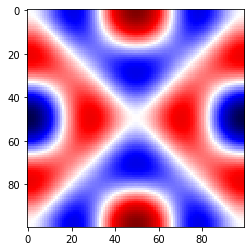

In [5]:
#We are simply using the geometry of the space in order to get results. 
#Therefore we do not need a RectangularSample object.

#Using a simple square mesh along with the helholtz solver in order to get eigenfunction eigenvalue pairs
mesh = UnitSquareMesh(100, 100)
start = time.time()
eigenvalue_eigenfunction_pairs = PM.helmholtz(mesh, 5, number_extracted=20,sigma_2 = s_2,to_plot=True)
end = time.time()
print('Time elapsed: {} seconds'.format(end-start))

#Getting eigenvalue eigenfunction pairs and storing it in a dictionary
processed_eigenvalue_eigenfunction_pairs = dict()

for key, value in eigenvalue_eigenfunction_pairs.items():
    processed_eigenvalue_eigenfunction_pairs[key]=PM.process_fenics_function(mesh,value)

In [6]:
processed_eigenvalue_eigenfunction_pairs.keys()

dict_keys([10.870415978784969, 10.870415978856077, 20.744077976051955, 40.4914017653286, 40.491405669381145, 50.36895078674847, 50.38065442463436, 80.03471629368495, 89.89218879987853, 89.89218883287455, 99.79181760827774, 99.79183168679292, 129.45108512309992, 129.5497728465087, 159.12145087528924, 159.12153181295733, 169.04065440265595, 169.0470275088289, 179.04640902974356, 198.82053895381515])

## Saving Eigenfunctions

In [7]:
with h5py.File("processed_eigenvalue_eigenfunction_pairs.h5",'a') as f:
    for key, value in processed_eigenvalue_eigenfunction_pairs.items():
        f[str(key)] = np.array(value)

## Creating Eigenfunctions

In [8]:
processed_eigenvalue_eigenfunction_pairs = dict()

with h5py.File("processed_eigenvalue_eigenfunction_pairs.h5",'r') as f:
    for key in list(f.keys()):
        processed_eigenvalue_eigenfunction_pairs[float(key)] = np.array(f.get(key))

# N=200

## Create larger eigenfunction

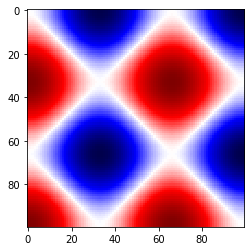

In [9]:
#We are simply using the geometry of the space in order to get results. 
#Therefore we do not need a RectangularSample object.

#Using a simple square mesh along with the helholtz solver in order to get eigenfunction eigenvalue pairs
mesh = UnitSquareMesh(200, 200)
eigenvalue_eigenfunction_pairs = PM.helmholtz(mesh,5, number_extracted=10,sigma_2 = s_2,to_plot=True)

#Getting eigenvalue eigenfunction pairs and storing it in a dictionary
processed_eigenvalue_eigenfunction_pairs = dict()

for key, value in eigenvalue_eigenfunction_pairs.items():
    processed_eigenvalue_eigenfunction_pairs[key]=PM.process_fenics_function(mesh,value)

## Saving Eigenfunctions

In [10]:
with h5py.File("processed_eigenvalue_eigenfunction_pairs_N=200.h5",'a') as f:
    for key, value in processed_eigenvalue_eigenfunction_pairs.items():
        f[str(key)] = np.array(value)

## Creating Eigenfunctions

In [11]:
processed_eigenvalue_eigenfunction_pairs = dict()

with h5py.File("processed_eigenvalue_eigenfunction_pairs_N=200.h5",'r') as f:
    for key in list(f.keys()):
        processed_eigenvalue_eigenfunction_pairs[float(key)] = np.array(f.get(key))